In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int64)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[0]


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
y_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

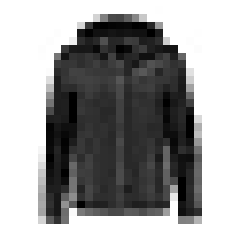

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

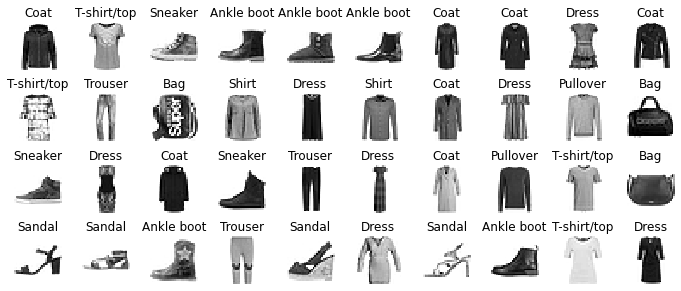

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(784, activation="relu"),
    keras.layers.Dense(28, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 28)                21980     
                                                                 
 dense_2 (Dense)             (None, 10)                290       
                                                                 
Total params: 637,710
Trainable params: 637,710
Non-trainable params: 0
_________________________________________________________________


In [15]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [16]:
model.layers[2].name

'dense_1'

In [17]:
weights, biases = model.layers[2].get_weights()

In [18]:
weights

array([[ 0.02051247,  0.03019074,  0.03162231, ...,  0.06511657,
        -0.075742  ,  0.05334122],
       [-0.07449015, -0.05751086,  0.06797951, ...,  0.02668607,
         0.08034188, -0.03590588],
       [-0.01390947,  0.01968379,  0.06596687, ..., -0.0614449 ,
        -0.02134842, -0.06096332],
       ...,
       [-0.04213622,  0.0690424 , -0.07531954, ..., -0.01384425,
         0.07878809, -0.04980563],
       [ 0.01280473, -0.00479205, -0.02628516, ..., -0.05621847,
        -0.03051617,  0.03182768],
       [ 0.05597045,  0.01320585, -0.0208343 , ..., -0.06963408,
         0.0026973 ,  0.0667529 ]], dtype=float32)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
weights.shape

(784, 28)

In [21]:
biases.shape

(28,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7091 - accuracy: 0.7678 - val_loss: 0.5047 - val_accuracy: 0.8278
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4821 - accuracy: 0.8318 - val_loss: 0.4347 - val_accuracy: 0.8558
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4389 - accuracy: 0.8460 - val_loss: 0.4041 - val_accuracy: 0.8616
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4130 - accuracy: 0.8552 - val_loss: 0.4136 - val_accuracy: 0.8544
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3933 - accuracy: 0.8613 - val_loss: 0.3823 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3761 - accuracy: 0.8670 - val_loss: 0.3666 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3614 - accuracy: 0.8717 - val_loss: 0.3678 - val_accuracy:

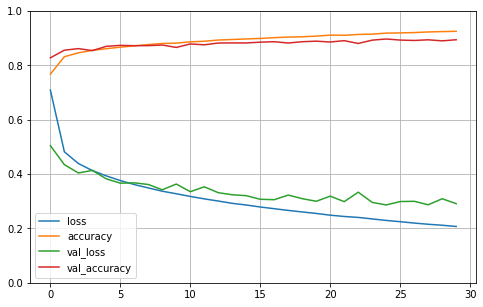

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.8872


[0.32174962759017944, 0.8871999979019165]

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 975us/step - loss: 0.8715 - val_loss: 0.7233
Epoch 2/20
363/363 [==============================] - 0s 810us/step - loss: 0.7953 - val_loss: 0.5874
Epoch 3/20
363/363 [==============================] - 0s 776us/step - loss: 0.5190 - val_loss: 0.5009
Epoch 4/20
363/363 [==============================] - 0s 779us/step - loss: 0.4770 - val_loss: 0.4708
Epoch 5/20
363/363 [==============================] - 0s 782us/step - loss: 0.4612 - val_loss: 0.4577
Epoch 6/20
363/363 [==============================] - 0s 790us/step - loss: 0.4454 - val_loss: 0.4554
Epoch 7/20
363/363 [==============================] - 0s 776us/step - loss: 0.4350 - val_loss: 0.4399
Epoch 8/20
363/363 [==============================] - 0s 768us/step - loss: 0.4291 - val_loss: 0.4368
Epoch 9/20
363/363 [==============================] - 0s 782us/step - loss: 0.4253 - val_loss: 0.4307
Epoch 10/20
363/363 [==============================] - 0s 776us/step - loss: 0.415

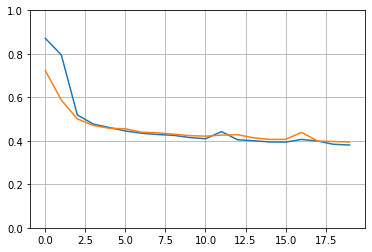

In [29]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
y_pred

array([[1.6302361],
       [2.5070558],
       [1.655421 ]], dtype=float32)

In [31]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [33]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [34]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0228 - val_loss: 0.8982
Epoch 2/20
363/363 [==============================] - 0s 892us/step - loss: 0.7812 - val_loss: 0.7377
Epoch 3/20
363/363 [==============================] - 0s 892us/step - loss: 0.6967 - val_loss: 0.6822
Epoch 4/20
363/363 [==============================] - 0s 887us/step - loss: 0.6553 - val_loss: 0.6468
Epoch 5/20
363/363 [==============================] - 0s 879us/step - loss: 0.6271 - val_loss: 0.6201
Epoch 6/20
363/363 [==============================] - 0s 887us/step - loss: 0.6063 - val_loss: 0.6008
Epoch 7/20
363/363 [==============================] - 0s 884us/step - loss: 0.5896 - val_loss: 0.5824
Epoch 8/20
363/363 [==============================] - 0s 879us/step - loss: 0.5768 - val_loss: 0.5700
Epoch 9/20
363/363 [==============================] - 0s 894us/step - loss: 0.5649 - val_loss: 0.5580
Epoch 10/20
363/363 [==============================] - 0s 881us/step - loss: 0.5557 

In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [36]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [37]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0624 - main_output_loss: 0.9198 - aux_output_loss: 2.3454 - val_loss: 0.8410 - val_main_output_loss: 0.7878 - val_aux_output_loss: 1.3201
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6766 - main_output_loss: 0.6123 - aux_output_loss: 1.2550 - val_loss: 0.5714 - val_main_output_loss: 0.5131 - val_aux_output_loss: 1.0962
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5574 - main_output_loss: 0.5051 - aux_output_loss: 1.0288 - val_loss: 0.5349 - val_main_output_loss: 0.4903 - val_aux_output_loss: 0.9368
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5205 - main_output_loss: 0.4793 - aux_output_loss: 0.8912 - val_loss: 0.5149 - val_main_output_loss: 0.4791 - val_aux_output_loss: 0.8367
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5025 - main_output_loss: 0.4692 - aux_output_loss: 0.8020 - val_loss

In [38]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 752us/step - loss: 0.3761 - main_output_loss: 0.3582 - aux_output_loss: 0.5372


In [39]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [40]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [41]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.7948 - output_1_loss: 2.6042 - output_2_loss: 4.5101 - val_loss: 1.3687 - val_output_1_loss: 1.1114 - val_output_2_loss: 3.6841
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 1.1567 - output_1_loss: 0.9364 - output_2_loss: 3.1397 - val_loss: 1.0097 - val_output_1_loss: 0.8386 - val_output_2_loss: 2.5500
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.9344 - output_1_loss: 0.7797 - output_2_loss: 2.3268 - val_loss: 0.8794 - val_output_1_loss: 0.7569 - val_output_2_loss: 1.9818
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8403 - output_1_loss: 0.7199 - output_2_loss: 1.9246 - val_loss: 0.8124 - val_output_1_loss: 0.7124 - val_output_2_loss: 1.7124
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7872 - output_1_loss: 0.6829 - output_2_loss: 1.7257 - val_loss: 0.7692 - val_output_1_loss: 0.6783 - val_ou

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [43]:
model.compile(loss="mse", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.2438 - val_loss: 0.5949
Epoch 2/10
363/363 [==============================] - 0s 815us/step - loss: 2.0338 - val_loss: 0.5366
Epoch 3/10
363/363 [==============================] - 0s 826us/step - loss: 0.4517 - val_loss: 0.4193
Epoch 4/10
363/363 [==============================] - 0s 823us/step - loss: 0.4083 - val_loss: 0.3897
Epoch 5/10
363/363 [==============================] - 0s 815us/step - loss: 0.6478 - val_loss: 0.5063
Epoch 6/10
363/363 [==============================] - 0s 826us/step - loss: 0.4413 - val_loss: 0.4077
Epoch 7/10
363/363 [==============================] - 0s 812us/step - loss: 0.3874 - val_loss: 0.3900
Epoch 8/10
363/363 [==============================] - 0s 818us/step - loss: 0.3679 - val_loss: 0.3715
Epoch 9/10
363/363 [==============================] - 0s 826us/step - loss: 0.3638 - val_loss: 0.3678
Epoch 10/10
162/162 [==============================] - 0s 596us/step - loss: 0.3443


In [44]:
model.save("my_model.h5")

In [45]:
model = keras.models.load_model("my_model.h5")

In [46]:
model.predict(X_new)

array([[1.3017472],
       [2.4227128],
       [1.5772861]], dtype=float32)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [48]:
model.compile(loss="mse", optimizer="sgd")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_model.h5")
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.9409 - val_loss: 0.6386
Epoch 2/10
363/363 [==============================] - 0s 881us/step - loss: 0.5680 - val_loss: 0.4812
Epoch 3/10
363/363 [==============================] - 0s 870us/step - loss: 0.4532 - val_loss: 0.4607
Epoch 4/10
363/363 [==============================] - 0s 868us/step - loss: 0.4254 - val_loss: 0.4232
Epoch 5/10
363/363 [==============================] - 0s 859us/step - loss: 0.4100 - val_loss: 0.4145
Epoch 6/10
363/363 [==============================] - 0s 868us/step - loss: 0.3989 - val_loss: 0.4074
Epoch 7/10
363/363 [==============================] - 0s 865us/step - loss: 0.3895 - val_loss: 0.3956
Epoch 8/10
363/363 [==============================] - 0s 845us/step - loss: 0.3818 - val_loss: 0.3985
Epoch 9/10
363/363 [==============================] - 0s 865us/step - loss: 0.3756 - val_loss: 0.3876
Epoch 10/10
162/162 [==============================] - 0s 603us/step - loss: 0.3656


In [49]:
model.compile(loss="mse", optimizer="sgd")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3647 - val_loss: 0.3828
Epoch 2/100
363/363 [==============================] - 0s 981us/step - loss: 0.3622 - val_loss: 0.3732
Epoch 3/100
363/363 [==============================] - 0s 859us/step - loss: 0.3592 - val_loss: 0.3683
Epoch 4/100
363/363 [==============================] - 0s 862us/step - loss: 0.3534 - val_loss: 0.3664
Epoch 5/100
363/363 [==============================] - 0s 812us/step - loss: 0.3512 - val_loss: 0.3702
Epoch 6/100
363/363 [==============================] - 0s 858us/step - loss: 0.3495 - val_loss: 0.3589
Epoch 7/100
363/363 [==============================] - 0s 862us/step - loss: 0.3435 - val_loss: 0.3564
Epoch 8/100
363/363 [==============================] - 0s 865us/step - loss: 0.3407 - val_loss: 0.3560
Epoch 9/100
363/363 [==============================] - 0s 868us/step - loss: 0.3361 - val_loss: 0.3506
Epoch 10/100
363/363 [==============================] - 0s 823us/step - los

In [52]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [56]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid), callbacks=[val_train_ratio_cb])

312/363 [========================>.....] - ETA: 0s - loss: 0.2770
val/train: 1.08
363/363 [==============================] - 0s 901us/step - loss: 0.2788 - val_loss: 0.3000


In [58]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_03_07-14_51_17'

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="sgd")

In [60]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.8470 - val_loss: 0.5185
Epoch 2/30
363/363 [==============================] - 0s 981us/step - loss: 0.4897 - val_loss: 0.4583
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4491 - val_loss: 0.4351
Epoch 4/30
363/363 [==============================] - 0s 973us/step - loss: 0.4288 - val_loss: 0.4264
Epoch 5/30
363/363 [==============================] - 0s 978us/step - loss: 0.4175 - val_loss: 0.4103
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4043 - val_loss: 0.4052
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3958 - val_loss: 0.4004
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3861 - val_loss: 0.3883
Epoch 9/30
363/363 [==============================] - 0s 848us/step - loss: 0.3788 - val_loss: 0.3766
Epoch 10/30
363/363 [==============================] - 0s 857us/step - loss: 0.3705 - val_lo

In [65]:
keras.backend.clear_session()

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [66]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [67]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
  1/363 [..............................] - ETA: 1:03 - loss: 6.5192

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 1ms/step - loss: 1.2080 - val_loss: 0.6669
Epoch 2/100
363/363 [==============================] - 0s 812us/step - loss: 0.6266 - val_loss: 0.5951
Epoch 3/100
363/363 [==============================] - 0s 890us/step - loss: 0.5741 - val_loss: 0.5773
Epoch 4/100
363/363 [==============================] - 0s 859us/step - loss: 0.5440 - val_loss: 0.5294
Epoch 5/100
363/363 [==============================] - 0s 813us/step - loss: 0.5224 - val_loss: 0.5133
Epoch 6/100
363/363 [==============================] - 0s 821us/step - loss: 0.5040 - val_loss: 0.4989
Epoch 7/100
363/363 [==============================] - 0s 815us/step - loss: 0.4965 - val_loss: 0.4909
Epoch 8/100
363/363 [==============================] - 0s 832us/step - loss: 0.4853 - val_loss: 0.4795
Epoch 9/100
363/363 [==============================] - 0s 812us/step - loss: 0.4771 - val_loss: 0.4735
Epoch 10/100
363/363 [==============================] - 0s 818us/step - loss: 0.4692 - 

In [68]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100


C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.3774 - val_loss: 0.6739
Epoch 2/100
242/242 [==============================] - 0s 934us/step - loss: 0.9874 - val_loss: 0.5302
Epoch 3/100
242/242 [==============================] - 0s 926us/step - loss: 0.5251 - val_loss: 0.4923
Epoch 4/100
242/242 [==============================] - 0s 946us/step - loss: 0.4834 - val_loss: 0.4743
Epoch 5/100
242/242 [==============================] - 0s 909us/step - loss: 0.4686 - val_loss: 0.4647
Epoch 6/100
242/242 [==============================] - 0s 946us/step - loss: 0.4558 - val_loss: 0.4630
Epoch 7/100
242/242 [==============================] - 0s 938us/step - loss: 0.4664 - val_loss: 0.4657
Epoch 8/100
242/242 [==============================] - 0s 930us/step - loss: 0.4488 - val_loss: 0.4544
Epoch 9/100
242/242 [==============================] - 0s 917us/step - loss: 0.4391 - val_loss: 0.4456
Epoch 10/100
242/242 [==============================] - 0s 909us/step - loss: 0.4329 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 0.8417 - val_loss: 0.5803
Epoch 2/100
242/242 [==============================] - 0s 905us/step - loss: 0.5858 - val_loss: 0.5431
Epoch 3/100
242/242 [==============================] - 0s 934us/step - loss: 0.5585 - val_loss: 0.4917
Epoch 4/100
242/242 [==============================] - 0s 896us/step - loss: 0.5573 - val_loss: 0.4861
Epoch 5/100
242/242 [==============================] - 0s 905us/step - loss: 0.4951 - val_loss: 0.4638
Epoch 6/100
242/242 [==============================] - 0s 917us/step - loss: 0.4814 - val_loss: 0.4570
Epoch 7/100
242/242 [==============================] - 0s 909us/step - loss: 0.4653 - val_loss: 0.4522
Epoch 8/100
242/242 [==============================] - 0s 892us/step - loss: 0.4540 - val_loss: 0.4489
Epoch 9/100
242/242 [==============================] - 0s 892us/step - loss: 0.4464 - val_loss: 0.4492
Epoch 10/100
242/242 [==============================] - 0s 946us/step - loss: 0.4429 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.2254 - val_loss: 0.6631
Epoch 2/100
242/242 [==============================] - 0s 901us/step - loss: 10.4776 - val_loss: 0.8203
Epoch 3/100
242/242 [==============================] - 0s 909us/step - loss: 0.5497 - val_loss: 0.4827
Epoch 4/100
242/242 [==============================] - 0s 930us/step - loss: 0.4387 - val_loss: 0.4418
Epoch 5/100
242/242 [==============================] - 0s 930us/step - loss: 0.4094 - val_loss: 0.4256
Epoch 6/100
242/242 [==============================] - 0s 926us/step - loss: 0.3968 - val_loss: 0.4172
Epoch 7/100
242/242 [==============================] - 0s 955us/step - loss: 0.3892 - val_loss: 0.4119
Epoch 8/100
242/242 [==============================] - 0s 950us/step - loss: 0.3835 - val_loss: 0.4068
Epoch 9/100
242/242 [==============================] - 0s 942us/step - loss: 0.3803 - val_loss: 0.4047
Epoch 10/100
242/242 [==============================] - 0s 921us/step - loss: 0.3769 -

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 2.2981 - val_loss: 1.2506
Epoch 2/100
242/242 [==============================] - 0s 934us/step - loss: 1.1052 - val_loss: 0.8879
Epoch 3/100
242/242 [==============================] - 0s 934us/step - loss: 0.8706 - val_loss: 0.7981
Epoch 4/100
242/242 [==============================] - 0s 896us/step - loss: 0.8044 - val_loss: 0.7583
Epoch 5/100
242/242 [==============================] - 0s 942us/step - loss: 0.7685 - val_loss: 0.7298
Epoch 6/100
242/242 [==============================] - 0s 913us/step - loss: 0.7404 - val_loss: 0.7063
Epoch 7/100
242/242 [==============================] - 0s 938us/step - loss: 0.7162 - val_loss: 0.6848
Epoch 8/100
242/242 [==============================] - 0s 967us/step - loss: 0.6944 - val_loss: 0.6656
Epoch 9/100
242/242 [==============================] - 0s 930us/step - loss: 0.6748 - val_loss: 0.6482
Epoch 10/100
242/242 [==============================] - 0s 909us/step - loss: 0.6572 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.8013 - val_loss: 1.1452
Epoch 2/100
242/242 [==============================] - 0s 959us/step - loss: 0.9109 - val_loss: 0.7803
Epoch 3/100
242/242 [==============================] - 0s 979us/step - loss: 0.7572 - val_loss: 0.7272
Epoch 4/100
242/242 [==============================] - 0s 988us/step - loss: 0.7212 - val_loss: 0.7024
Epoch 5/100
242/242 [==============================] - 0s 946us/step - loss: 0.6974 - val_loss: 0.6820
Epoch 6/100
242/242 [==============================] - 0s 934us/step - loss: 0.6777 - val_loss: 0.6644
Epoch 7/100
242/242 [==============================] - 0s 984us/step - loss: 0.6602 - val_loss: 0.6480
Epoch 8/100
242/242 [==============================] - 0s 921us/step - loss: 0.6444 - val_loss: 0.6332
Epoch 9/100
242/242 [==============================] - 0s 938us/step - loss: 0.6302 - val_loss: 0.6197
Epoch 10/100
242/242 [==============================] - 0s 913us/step - loss: 0.6172 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.3578 - val_loss: 1.3118
Epoch 2/100
242/242 [==============================] - 0s 950us/step - loss: 1.0214 - val_loss: 0.8666
Epoch 3/100
242/242 [==============================] - 0s 934us/step - loss: 0.7867 - val_loss: 0.7574
Epoch 4/100
242/242 [==============================] - 0s 917us/step - loss: 0.7140 - val_loss: 0.7114
Epoch 5/100
242/242 [==============================] - 0s 913us/step - loss: 0.6788 - val_loss: 0.6850
Epoch 6/100
242/242 [==============================] - 0s 942us/step - loss: 0.6547 - val_loss: 0.6648
Epoch 7/100
242/242 [==============================] - 0s 944us/step - loss: 0.6350 - val_loss: 0.6464
Epoch 8/100
242/242 [==============================] - 0s 902us/step - loss: 0.6185 - val_loss: 0.6312
Epoch 9/100
242/242 [==============================] - 0s 907us/step - loss: 0.6031 - val_loss: 0.6168
Epoch 10/100
242/242 [==============================] - 0s 950us/step - loss: 0.5892 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.5168 - val_loss: 0.7026
Epoch 2/100
242/242 [==============================] - 0s 942us/step - loss: 0.6848 - val_loss: 0.6357
Epoch 3/100
242/242 [==============================] - 0s 938us/step - loss: 0.6294 - val_loss: 0.5952
Epoch 4/100
242/242 [==============================] - 0s 930us/step - loss: 0.5875 - val_loss: 0.5655
Epoch 5/100
242/242 [==============================] - 0s 901us/step - loss: 0.5636 - val_loss: 0.5443
Epoch 6/100
242/242 [==============================] - 0s 913us/step - loss: 0.5439 - val_loss: 0.5293
Epoch 7/100
242/242 [==============================] - 0s 880us/step - loss: 0.5278 - val_loss: 0.5180
Epoch 8/100
242/242 [==============================] - 0s 909us/step - loss: 0.5159 - val_loss: 0.5065
Epoch 9/100
242/242 [==============================] - 0s 905us/step - loss: 0.5075 - val_loss: 0.5001
Epoch 10/100
242/242 [==============================] - 0s 913us/step - loss: 0.4989 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.3372 - val_loss: 0.7499
Epoch 2/100
242/242 [==============================] - 0s 917us/step - loss: 0.7427 - val_loss: 0.6764
Epoch 3/100
242/242 [==============================] - 0s 950us/step - loss: 0.6688 - val_loss: 0.6257
Epoch 4/100
242/242 [==============================] - 0s 905us/step - loss: 0.6199 - val_loss: 0.5878
Epoch 5/100
242/242 [==============================] - 0s 946us/step - loss: 0.5860 - val_loss: 0.5625
Epoch 6/100
242/242 [==============================] - 0s 946us/step - loss: 0.5595 - val_loss: 0.5341
Epoch 7/100
242/242 [==============================] - 0s 971us/step - loss: 0.5377 - val_loss: 0.5185
Epoch 8/100
242/242 [==============================] - 0s 955us/step - loss: 0.5223 - val_loss: 0.5103
Epoch 9/100
242/242 [==============================] - 0s 917us/step - loss: 0.5101 - val_loss: 0.4945
Epoch 10/100
242/242 [==============================] - 0s 950us/step - loss: 0.5031 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.7925 - val_loss: 0.7608
Epoch 2/100
242/242 [==============================] - 0s 938us/step - loss: 0.7257 - val_loss: 0.6974
Epoch 3/100
242/242 [==============================] - 0s 905us/step - loss: 0.8026 - val_loss: 0.6284
Epoch 4/100
242/242 [==============================] - 0s 975us/step - loss: 1.6115 - val_loss: 0.7044
Epoch 5/100
242/242 [==============================] - 0s 913us/step - loss: 0.7240 - val_loss: 0.6330
Epoch 6/100
242/242 [==============================] - 0s 959us/step - loss: 0.5941 - val_loss: 0.6049
Epoch 7/100
242/242 [==============================] - 0s 955us/step - loss: 0.5671 - val_loss: 0.5794
Epoch 8/100
242/242 [==============================] - 0s 974us/step - loss: 0.5469 - val_loss: 0.5613
Epoch 9/100
242/242 [==============================] - 0s 950us/step - loss: 0.5311 - val_loss: 0.5455
Epoch 10/100
242/242 [==============================] - 0s 943us/step - loss: 0.5191 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 3.4470 - val_loss: 0.7204
Epoch 2/100
242/242 [==============================] - 0s 921us/step - loss: 0.7379 - val_loss: 0.5948
Epoch 3/100
242/242 [==============================] - 0s 934us/step - loss: 0.6063 - val_loss: 0.5673
Epoch 4/100
242/242 [==============================] - 0s 901us/step - loss: 0.5998 - val_loss: 0.5612
Epoch 5/100
242/242 [==============================] - 0s 909us/step - loss: 0.5627 - val_loss: 0.5530
Epoch 6/100
242/242 [==============================] - 0s 913us/step - loss: 0.5554 - val_loss: 0.5474
Epoch 7/100
242/242 [==============================] - 0s 955us/step - loss: 0.5502 - val_loss: 0.5423
Epoch 8/100
242/242 [==============================] - 0s 950us/step - loss: 0.5484 - val_loss: 0.5400
Epoch 9/100
242/242 [==============================] - 0s 946us/step - loss: 0.5484 - val_loss: 0.5396
Epoch 10/100
242/242 [==============================] - 0s 892us/step - loss: 0.5472 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.0732 - val_loss: 0.8571
Epoch 2/100
242/242 [==============================] - 0s 975us/step - loss: 0.7658 - val_loss: 0.6989
Epoch 3/100
242/242 [==============================] - 0s 942us/step - loss: 0.6776 - val_loss: 0.6534
Epoch 4/100
242/242 [==============================] - 0s 942us/step - loss: 0.6415 - val_loss: 0.6240
Epoch 5/100
242/242 [==============================] - 0s 984us/step - loss: 0.6178 - val_loss: 0.6020
Epoch 6/100
242/242 [==============================] - 0s 959us/step - loss: 0.6002 - val_loss: 0.5851
Epoch 7/100
242/242 [==============================] - 0s 955us/step - loss: 0.5883 - val_loss: 0.5727
Epoch 8/100
242/242 [==============================] - 0s 980us/step - loss: 0.5770 - val_loss: 0.5628
Epoch 9/100
242/242 [==============================] - 0s 938us/step - loss: 0.5725 - val_loss: 0.5562
Epoch 10/100
242/242 [==============================] - 0s 971us/step - loss: 0.5659 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.5289 - val_loss: 0.7591
Epoch 2/100
242/242 [==============================] - 0s 929us/step - loss: 1.6609 - val_loss: 0.6073
Epoch 3/100
242/242 [==============================] - 0s 917us/step - loss: 2.3431 - val_loss: 0.6819
Epoch 4/100
242/242 [==============================] - 0s 930us/step - loss: 3.2871 - val_loss: 0.5996
Epoch 5/100
242/242 [==============================] - 0s 950us/step - loss: 5.1562 - val_loss: 0.8293
Epoch 6/100
242/242 [==============================] - 0s 946us/step - loss: 7.9515 - val_loss: 0.7623
Epoch 7/100
242/242 [==============================] - 0s 959us/step - loss: 12.9131 - val_loss: 1.0722
Epoch 8/100
242/242 [==============================] - 0s 955us/step - loss: 20.3232 - val_loss: 1.0452
Epoch 9/100
242/242 [==============================] - 0s 955us/step - loss: 32.9640 - val_loss: 2.1559
Epoch 10/100
242/242 [==============================] - 0s 913us/step - loss: 52.970

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 2.2112 - val_loss: 0.9839
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8327 - val_loss: 0.6984
Epoch 3/100
242/242 [==============================] - 0s 983us/step - loss: 0.6772 - val_loss: 0.6270
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6149 - val_loss: 0.5866
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5756 - val_loss: 0.5600
Epoch 6/100
242/242 [==============================] - 0s 984us/step - loss: 0.5485 - val_loss: 0.5393
Epoch 7/100
242/242 [==============================] - 0s 975us/step - loss: 0.5292 - val_loss: 0.5255
Epoch 8/100
242/242 [==============================] - 0s 996us/step - loss: 0.5157 - val_loss: 0.5176
Epoch 9/100
242/242 [==============================] - 0s 988us/step - loss: 0.5059 - val_loss: 0.5066
Epoch 10/100
242/242 [==============================] - 0s 979us/step - loss: 0.4972 - val_lo

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 1.8124 - val_loss: 0.8633
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8246 - val_loss: 0.7642
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7039 - val_loss: 0.6668
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6574 - val_loss: 0.6339
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6244 - val_loss: 0.6043
Epoch 6/100
242/242 [==============================] - 0s 984us/step - loss: 0.5979 - val_loss: 0.5783
Epoch 7/100
242/242 [==============================] - 0s 979us/step - loss: 0.5765 - val_loss: 0.5584
Epoch 8/100
242/242 [==============================] - 0s 988us/step - loss: 0.5567 - val_loss: 0.5410
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5417 - val_loss: 0.5296
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5299 - val_loss: 0.

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.4903 - val_loss: 0.8713
Epoch 2/100
242/242 [==============================] - 0s 905us/step - loss: 0.7244 - val_loss: 0.6795
Epoch 3/100
242/242 [==============================] - 0s 905us/step - loss: 0.6212 - val_loss: 0.6255
Epoch 4/100
242/242 [==============================] - 0s 905us/step - loss: 0.5804 - val_loss: 0.5962
Epoch 5/100
242/242 [==============================] - 0s 896us/step - loss: 0.5583 - val_loss: 0.5758
Epoch 6/100
242/242 [==============================] - 0s 900us/step - loss: 0.5403 - val_loss: 0.5591
Epoch 7/100
242/242 [==============================] - 0s 909us/step - loss: 0.5271 - val_loss: 0.5461
Epoch 8/100
242/242 [==============================] - 0s 909us/step - loss: 0.5152 - val_loss: 0.5359
Epoch 9/100
242/242 [==============================] - 0s 905us/step - loss: 0.5051 - val_loss: 0.5249
Epoch 10/100
242/242 [==============================] - 0s 905us/step - loss: 0.4966 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.7659 - val_loss: 1.3093
Epoch 2/100
242/242 [==============================] - 0s 884us/step - loss: 1.1226 - val_loss: 0.8490
Epoch 3/100
242/242 [==============================] - 0s 888us/step - loss: 0.7990 - val_loss: 0.7421
Epoch 4/100
242/242 [==============================] - 0s 872us/step - loss: 0.7275 - val_loss: 0.6994
Epoch 5/100
242/242 [==============================] - 0s 888us/step - loss: 0.6939 - val_loss: 0.6721
Epoch 6/100
242/242 [==============================] - 0s 882us/step - loss: 0.6694 - val_loss: 0.6507
Epoch 7/100
242/242 [==============================] - 0s 888us/step - loss: 0.6484 - val_loss: 0.6316
Epoch 8/100
242/242 [==============================] - 0s 884us/step - loss: 0.6305 - val_loss: 0.6156
Epoch 9/100
242/242 [==============================] - 0s 884us/step - loss: 0.6148 - val_loss: 0.6018
Epoch 10/100
242/242 [==============================] - 0s 892us/step - loss: 0.6006 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 3.2852 - val_loss: 1.5561
Epoch 2/100
242/242 [==============================] - 0s 892us/step - loss: 1.2149 - val_loss: 0.8902
Epoch 3/100
242/242 [==============================] - 0s 888us/step - loss: 0.8515 - val_loss: 0.7543
Epoch 4/100
242/242 [==============================] - 0s 867us/step - loss: 0.7569 - val_loss: 0.7126
Epoch 5/100
242/242 [==============================] - 0s 876us/step - loss: 0.7186 - val_loss: 0.6883
Epoch 6/100
242/242 [==============================] - 0s 876us/step - loss: 0.6933 - val_loss: 0.6702
Epoch 7/100
242/242 [==============================] - 0s 880us/step - loss: 0.6739 - val_loss: 0.6539
Epoch 8/100
242/242 [==============================] - 0s 884us/step - loss: 0.6572 - val_loss: 0.6397
Epoch 9/100
242/242 [==============================] - 0s 888us/step - loss: 0.6427 - val_loss: 0.6270
Epoch 10/100
242/242 [==============================] - 0s 884us/step - loss: 0.6298 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.2985 - val_loss: 1.2520
Epoch 2/100
242/242 [==============================] - 0s 892us/step - loss: 0.9969 - val_loss: 0.8556
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7677 - val_loss: 0.7601
Epoch 4/100
242/242 [==============================] - 0s 892us/step - loss: 0.7060 - val_loss: 0.7194
Epoch 5/100
242/242 [==============================] - 0s 884us/step - loss: 0.6747 - val_loss: 0.6941
Epoch 6/100
242/242 [==============================] - 0s 872us/step - loss: 0.6533 - val_loss: 0.6750
Epoch 7/100
242/242 [==============================] - 0s 884us/step - loss: 0.6361 - val_loss: 0.6592
Epoch 8/100
242/242 [==============================] - 0s 884us/step - loss: 0.6216 - val_loss: 0.6449
Epoch 9/100
242/242 [==============================] - 0s 880us/step - loss: 0.6084 - val_loss: 0.6321
Epoch 10/100
242/242 [==============================] - 0s 888us/step - loss: 0.5970 - va

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 2.0944 - val_loss: 0.9751
Epoch 2/100
242/242 [==============================] - 0s 988us/step - loss: 0.8500 - val_loss: 0.7531
Epoch 3/100
242/242 [==============================] - 0s 975us/step - loss: 0.7414 - val_loss: 0.7040
Epoch 4/100
242/242 [==============================] - 0s 963us/step - loss: 0.6991 - val_loss: 0.6692
Epoch 5/100
242/242 [==============================] - 0s 971us/step - loss: 0.6659 - val_loss: 0.6408
Epoch 6/100
242/242 [==============================] - 0s 958us/step - loss: 0.6384 - val_loss: 0.6178
Epoch 7/100
242/242 [==============================] - 0s 959us/step - loss: 0.6141 - val_loss: 0.5980
Epoch 8/100
242/242 [==============================] - 0s 963us/step - loss: 0.5940 - val_loss: 0.5805
Epoch 9/100
242/242 [==============================] - 0s 979us/step - loss: 0.5765 - val_loss: 0.5653
Epoch 10/100
242/242 [==============================] - 0s 975us/step - loss: 0.5616 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.2389 - val_loss: 0.8824
Epoch 2/100
242/242 [==============================] - 0s 963us/step - loss: 0.9305 - val_loss: 0.7503
Epoch 3/100
242/242 [==============================] - 0s 946us/step - loss: 0.7597 - val_loss: 0.7016
Epoch 4/100
242/242 [==============================] - 0s 959us/step - loss: 0.6980 - val_loss: 0.6697
Epoch 5/100
242/242 [==============================] - 0s 959us/step - loss: 0.6614 - val_loss: 0.6427
Epoch 6/100
242/242 [==============================] - 0s 984us/step - loss: 0.6344 - val_loss: 0.6206
Epoch 7/100
242/242 [==============================] - 0s 963us/step - loss: 0.6126 - val_loss: 0.6017
Epoch 8/100
242/242 [==============================] - 0s 950us/step - loss: 0.5948 - val_loss: 0.5850
Epoch 9/100
242/242 [==============================] - 0s 950us/step - loss: 0.5790 - val_loss: 0.5716
Epoch 10/100
242/242 [==============================] - 0s 963us/step - loss: 0.5662 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.2448 - val_loss: 1.0148
Epoch 2/100
242/242 [==============================] - 0s 971us/step - loss: 0.8485 - val_loss: 0.7886
Epoch 3/100
242/242 [==============================] - 0s 947us/step - loss: 0.7375 - val_loss: 0.7305
Epoch 4/100
242/242 [==============================] - 0s 938us/step - loss: 0.6912 - val_loss: 0.6970
Epoch 5/100
242/242 [==============================] - 0s 938us/step - loss: 0.6599 - val_loss: 0.6703
Epoch 6/100
242/242 [==============================] - 0s 946us/step - loss: 0.6358 - val_loss: 0.6487
Epoch 7/100
242/242 [==============================] - 0s 955us/step - loss: 0.6152 - val_loss: 0.6296
Epoch 8/100
242/242 [==============================] - 0s 930us/step - loss: 0.5969 - val_loss: 0.6129
Epoch 9/100
242/242 [==============================] - 0s 955us/step - loss: 0.5805 - val_loss: 0.5964
Epoch 10/100
242/242 [==============================] - 0s 955us/step - loss: 0.5661 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 3.5063 - val_loss: 1.7367
Epoch 2/100
242/242 [==============================] - 0s 884us/step - loss: 1.2869 - val_loss: 0.8950
Epoch 3/100
242/242 [==============================] - 0s 901us/step - loss: 0.8264 - val_loss: 0.7411
Epoch 4/100
242/242 [==============================] - 0s 901us/step - loss: 0.7406 - val_loss: 0.7089
Epoch 5/100
242/242 [==============================] - 0s 888us/step - loss: 0.7098 - val_loss: 0.6843
Epoch 6/100
242/242 [==============================] - 0s 894us/step - loss: 0.6856 - val_loss: 0.6638
Epoch 7/100
242/242 [==============================] - 0s 896us/step - loss: 0.6657 - val_loss: 0.6453
Epoch 8/100
242/242 [==============================] - 0s 897us/step - loss: 0.6475 - val_loss: 0.6291
Epoch 9/100
242/242 [==============================] - 0s 896us/step - loss: 0.6314 - val_loss: 0.6150
Epoch 10/100
242/242 [==============================] - 0s 884us/step - loss: 0.6169 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 3.0596 - val_loss: 1.7344
Epoch 2/100
242/242 [==============================] - 0s 896us/step - loss: 1.2696 - val_loss: 0.9756
Epoch 3/100
242/242 [==============================] - 0s 876us/step - loss: 0.8935 - val_loss: 0.8179
Epoch 4/100
242/242 [==============================] - 0s 896us/step - loss: 0.8067 - val_loss: 0.7669
Epoch 5/100
242/242 [==============================] - 0s 905us/step - loss: 0.7692 - val_loss: 0.7379
Epoch 6/100
242/242 [==============================] - 0s 901us/step - loss: 0.7438 - val_loss: 0.7167
Epoch 7/100
242/242 [==============================] - 0s 892us/step - loss: 0.7234 - val_loss: 0.6986
Epoch 8/100
242/242 [==============================] - 0s 892us/step - loss: 0.7063 - val_loss: 0.6831
Epoch 9/100
242/242 [==============================] - 0s 896us/step - loss: 0.6910 - val_loss: 0.6695
Epoch 10/100
242/242 [==============================] - 0s 892us/step - los

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.9196 - val_loss: 1.7966
Epoch 2/100
242/242 [==============================] - 0s 909us/step - loss: 1.3992 - val_loss: 1.1348
Epoch 3/100
242/242 [==============================] - 0s 901us/step - loss: 0.9742 - val_loss: 0.8738
Epoch 4/100
242/242 [==============================] - 0s 913us/step - loss: 0.7837 - val_loss: 0.7569
Epoch 5/100
242/242 [==============================] - 0s 892us/step - loss: 0.6980 - val_loss: 0.7024
Epoch 6/100
242/242 [==============================] - 0s 898us/step - loss: 0.6561 - val_loss: 0.6719
Epoch 7/100
242/242 [==============================] - 0s 896us/step - loss: 0.6301 - val_loss: 0.6495
Epoch 8/100
242/242 [==============================] - 0s 917us/step - loss: 0.6098 - val_loss: 0.6308
Epoch 9/100
242/242 [==============================] - 0s 896us/step - loss: 0.5928 - val_loss: 0.6142
Epoch 10/100
242/242 [==============================] - 0s 921us/step - loss: 0.5781 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.0396 - val_loss: 0.9006
Epoch 2/100
242/242 [==============================] - 0s 888us/step - loss: 0.8710 - val_loss: 0.7185
Epoch 3/100
242/242 [==============================] - 0s 876us/step - loss: 0.7226 - val_loss: 0.6658
Epoch 4/100
242/242 [==============================] - 0s 888us/step - loss: 0.6841 - val_loss: 0.6398
Epoch 5/100
242/242 [==============================] - 0s 884us/step - loss: 0.6409 - val_loss: 0.6132
Epoch 6/100
242/242 [==============================] - 0s 872us/step - loss: 0.6158 - val_loss: 0.5929
Epoch 7/100
242/242 [==============================] - 0s 884us/step - loss: 0.5945 - val_loss: 0.5768
Epoch 8/100
242/242 [==============================] - 0s 872us/step - loss: 0.5777 - val_loss: 0.5622
Epoch 9/100
242/242 [==============================] - 0s 888us/step - loss: 0.5626 - val_loss: 0.5517
Epoch 10/100
242/242 [==============================] - 0s 880us/step - loss: 0.5501 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 2.4952 - val_loss: 0.9147
Epoch 2/100
242/242 [==============================] - 0s 884us/step - loss: 0.7916 - val_loss: 0.7149
Epoch 3/100
242/242 [==============================] - 0s 876us/step - loss: 0.6943 - val_loss: 0.6696
Epoch 4/100
242/242 [==============================] - 0s 872us/step - loss: 0.6601 - val_loss: 0.6416
Epoch 5/100
242/242 [==============================] - 0s 872us/step - loss: 0.6377 - val_loss: 0.6226
Epoch 6/100
242/242 [==============================] - 0s 876us/step - loss: 0.6179 - val_loss: 0.6046
Epoch 7/100
242/242 [==============================] - 0s 876us/step - loss: 0.6010 - val_loss: 0.5876
Epoch 8/100
242/242 [==============================] - 0s 880us/step - loss: 0.5890 - val_loss: 0.5747
Epoch 9/100
242/242 [==============================] - 0s 888us/step - loss: 0.5760 - val_loss: 0.5639
Epoch 10/100
242/242 [==============================] - 0s 876us/step - loss: 0.5641 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.9819 - val_loss: 0.9726
Epoch 2/100
242/242 [==============================] - 0s 892us/step - loss: 0.7676 - val_loss: 0.7049
Epoch 3/100
242/242 [==============================] - 0s 884us/step - loss: 0.6551 - val_loss: 0.6580
Epoch 4/100
242/242 [==============================] - 0s 880us/step - loss: 0.6216 - val_loss: 0.6310
Epoch 5/100
242/242 [==============================] - 0s 876us/step - loss: 0.5930 - val_loss: 0.6074
Epoch 6/100
242/242 [==============================] - 0s 876us/step - loss: 0.5718 - val_loss: 0.5865
Epoch 7/100
242/242 [==============================] - 0s 884us/step - loss: 0.5537 - val_loss: 0.5693
Epoch 8/100
242/242 [==============================] - 0s 888us/step - loss: 0.5371 - val_loss: 0.5522
Epoch 9/100
242/242 [==============================] - 0s 884us/step - loss: 0.5259 - val_loss: 0.5408
Epoch 10/100
242/242 [==============================] - 0s 884us/step - loss: 0.5124 - 

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 1.3135 - val_loss: 0.6660
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0332 - val_loss: 0.5614
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5128 - val_loss: 0.4725
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4434 - val_loss: 0.4255
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4144 - val_loss: 0.3983
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3871 - val_loss: 0.4121
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3745 - val_loss: 0.3847
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3654 - val_loss: 0.3964
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3577 - val_loss: 0.3619
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3497 - val_loss: 0.3666
E

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 0.8210 - val_loss: 0.5185
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5189 - val_loss: 0.4738
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4576 - val_loss: 0.4321
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4326 - val_loss: 0.4195
Epoch 5/100
242/242 [==============================] - 0s 992us/step - loss: 0.4182 - val_loss: 0.4030
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4052 - val_loss: 0.4021
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3956 - val_loss: 0.3947
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3878 - val_loss: 0.4086
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3794 - val_loss: 0.3976
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3775 - val_loss: 0.3896

C:\Users\ozing\miniconda3\envs\handson-ml2\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 1.1041 - val_loss: 0.5759
Epoch 2/100
242/242 [==============================] - 0s 991us/step - loss: 0.5189 - val_loss: 0.4972
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7002 - val_loss: 0.5254
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 2.3897 - val_loss: 6.7200
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5524 - val_loss: 0.4475
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4211 - val_loss: 0.4140
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3834 - val_loss: 0.3830
Epoch 8/100
242/242 [==============================] - 0s 992us/step - loss: 0.3679 - val_loss: 0.4079
Epoch 9/100
242/242 [==============================] - 0s 996us/step - loss: 0.3515 - val_loss: 0.3893
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3412 - val_loss: 0.

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001C82B11D088>,
                   param_distributions={'learning_rate': [0.027691457623632842,
                                                          0.007539355530202844,
                                                          0.0021066278932862785,
                                                          0.0028037914077228437,
                                                          0.0013940419903195136,
                                                          0.010827748068018995,
                                                          0.0019805802614542693,
                                                          0.011112004034319285,
                                                          0.0013046412240822812,
                                                          0.00195154977...
                                                          0.00982568655

In [69]:
rnd_search_cv.best_params_

{'n_neurons': 68, 'n_hidden': 3, 'learning_rate': 0.009930511533267052}

In [70]:
rnd_search_cv.best_score_

-0.31939783692359924

In [71]:
model = rnd_search_cv.best_estimator_.model

In [72]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 631us/step - loss: 0.2880


0.28802862763404846